In [1]:
# Karan Kahlon
# kkahlon@wisc.edu

# Part 1: Prediction with Hardcoded Model

In [2]:
import pandas as pd
import torch
import numpy as np
import time

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train

,POS_0_9_CP,POS_10_19_CP,POS_20_29_CP,POS_30_39_CP,POS_40_49_CP,POS_50_59_CP,POS_60_69_CP,POS_70_79_CP,POS_80_89_CP,POS_90_CP,DTH_CUM_CP
0,24,51,44,51,60,75,72,61,27,0,3
1,22,31,214,177,62,46,24,9,0,0,2
2,84,126,239,194,159,171,125,74,24,8,9
3,65,76,80,110,82,81,55,49,56,34,7
4,99,107,339,287,139,147,110,71,37,0,12
...,...,...,...,...,...,...,...,...,...,...,...
1039,86,201,206,202,240,317,225,138,48,0,7
1040,80,102,125,124,104,71,70,36,6,0,6
1041,268,358,277,415,355,332,215,107,47,7,5
1042,81,116,90,145,118,113,70,36,9,0,2


In [4]:
trainX = train.values[:,:-1]
trainY = train.values[:,-1:]
testX = test.values[:,:-1]
testY = test.values[:,-1:]
trainX

array([[ 24,  51,  44, ...,  61,  27,   0],
       [ 22,  31, 214, ...,   9,   0,   0],
       [ 84, 126, 239, ...,  74,  24,   8],
       ...,
       [268, 358, 277, ..., 107,  47,   7],
       [ 81, 116,  90, ...,  36,   9,   0],
       [118, 156, 197, ...,  19,   0,   0]])

In [5]:
trainX = torch.tensor(trainX, dtype=torch.float64)
trainY = torch.tensor(trainY, dtype=torch.float64)
testX = torch.tensor(testX, dtype=torch.float64)
testY = torch.tensor(testY, dtype=torch.float64)
trainX

tensor([[ 24.,  51.,  44.,  ...,  61.,  27.,   0.],
        [ 22.,  31., 214.,  ...,   9.,   0.,   0.],
        [ 84., 126., 239.,  ...,  74.,  24.,   8.],
        ...,
        [268., 358., 277.,  ..., 107.,  47.,   7.],
        [ 81., 116.,  90.,  ...,  36.,   9.,   0.],
        [118., 156., 197.,  ...,  19.,   0.,   0.]], dtype=torch.float64)

In [6]:
coef = torch.tensor([
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040], # POS_50_59_CP
        [0.0300], # POS_60_69_CP
        [0.0300],
        [0.0300],
        [0.0300]
], dtype=testX.dtype)
coef

tensor([[0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0040],
        [0.0300],
        [0.0300],
        [0.0300],
        [0.0300]], dtype=torch.float64)

In [7]:
if torch.cuda.is_available():
    trainX = trainX.to("cuda")
    trainY = trainY.to("cuda")
    testX = testX.to("cuda")
    testY = testY.to("cuda")
    coef = coef.to("cuda")

pred_deaths = testX[0] @ coef
pred_deaths.item()

9.844

# Part 2: R^2 Score

In [8]:
predictedY = testX @ coef

In [9]:
def r2_score(trueY, predictedY):
    average = trueY.mean()
    SStot = trueY - average
    SStot = SStot.T @ SStot
    SSreg = trueY - predictedY
    SSreg = SSreg.T @ SSreg
    improvement = SStot - SSreg
    score = improvement/SStot
    return score.item()

In [10]:
r2_score(testY, predictedY)

0.4110350328841715

# Part 3: Optimization

In [11]:
x = torch.tensor(0.0, requires_grad=True)
y = x**2 - 8*x + 19
y

tensor(19., grad_fn=<AddBackward0>)

In [12]:
optimizer = torch.optim.SGD([x], lr=0.1)

for epoch in range(30):
    optimizer.zero_grad()
    y = x**2 - 8*x + 19
    y.backward()
    optimizer.step()
    print(x, y)

tensor(0.8000, requires_grad=True) tensor(19., grad_fn=<AddBackward0>)
tensor(1.4400, requires_grad=True) tensor(13.2400, grad_fn=<AddBackward0>)
tensor(1.9520, requires_grad=True) tensor(9.5536, grad_fn=<AddBackward0>)
tensor(2.3616, requires_grad=True) tensor(7.1943, grad_fn=<AddBackward0>)
tensor(2.6893, requires_grad=True) tensor(5.6844, grad_fn=<AddBackward0>)
tensor(2.9514, requires_grad=True) tensor(4.7180, grad_fn=<AddBackward0>)
tensor(3.1611, requires_grad=True) tensor(4.0995, grad_fn=<AddBackward0>)
tensor(3.3289, requires_grad=True) tensor(3.7037, grad_fn=<AddBackward0>)
tensor(3.4631, requires_grad=True) tensor(3.4504, grad_fn=<AddBackward0>)
tensor(3.5705, requires_grad=True) tensor(3.2882, grad_fn=<AddBackward0>)
tensor(3.6564, requires_grad=True) tensor(3.1845, grad_fn=<AddBackward0>)
tensor(3.7251, requires_grad=True) tensor(3.1181, grad_fn=<AddBackward0>)
tensor(3.7801, requires_grad=True) tensor(3.0756, grad_fn=<AddBackward0>)
tensor(3.8241, requires_grad=True) tenso

In [13]:
x.item()

3.9950480461120605

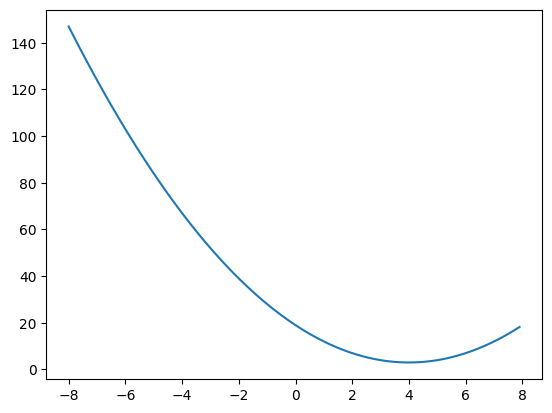

In [14]:
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 8*x + 19

x = torch.arange(-8, 8, 0.1)
y = f(x)
plt.plot(x, y)

# Part 4: Linear Regression

In [15]:
ds = torch.utils.data.TensorDataset(
    trainX,
    trainY
)
ds

In [16]:
dl = torch.utils.data.DataLoader(ds, shuffle=True, batch_size=75)
dl

In [17]:
model = torch.nn.Linear(10, 1, dtype=torch.float64)
optimizer = torch.optim.SGD([model.weight, model.bias], lr=0.00000075)
loss_fn = torch.nn.MSELoss()

start = time.time()
for epoch in range(150):
    for batchx, batchy in dl:
        optimizer.zero_grad()
        predicty = model(batchx)
        loss = loss_fn(batchy, predicty)
        loss.backward()
        optimizer.step()
    x, y = ds[:]
end = time.time()

In [18]:
r2_score(testY, model(testX))

0.5394965675801932

In [19]:
length = end - start
print(length,"seconds")

1.568251132965088 seconds


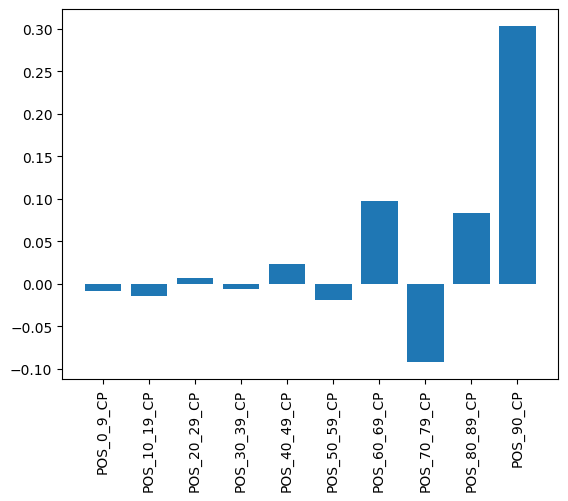

In [20]:
cols = train.columns[:-1]
plt.bar(cols, model.weight.detach().numpy()[0])
plt.xticks(range(10), cols, rotation="vertical")
None